In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

Image shape: (796, 796)


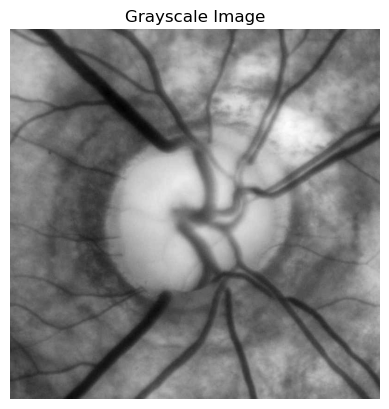

In [25]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the image path is correct
image_path = r'F:\new project 2025\Retina Disease\Data\acrima\advance_glaucoma\AG3.jpg'

# Load the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


# Check the shape of the image array
print("Image shape:", img.shape)

# Display the image
plt.imshow(img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


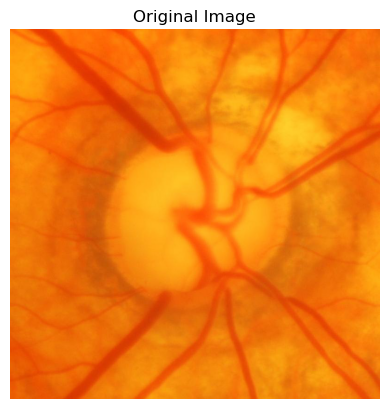

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read the image
img = mpimg.imread(image_path)

# Display the image using Matplotlib
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

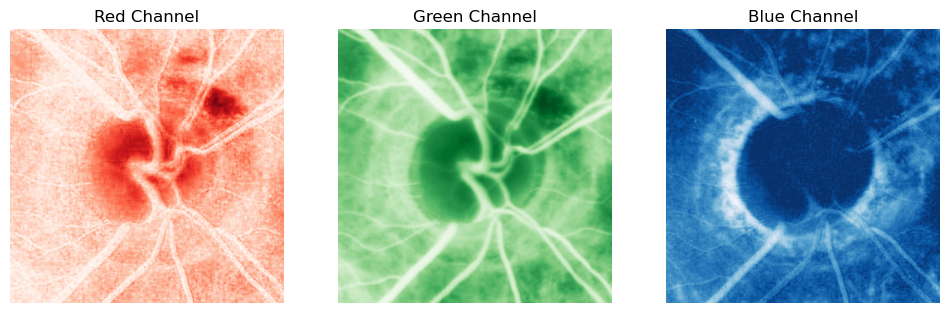

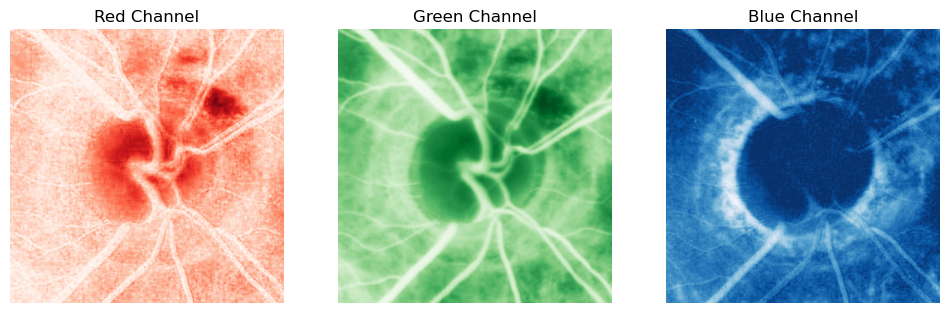

In [27]:
import matplotlib.pyplot as plt
import cv2

# Read the image
img = cv2.imread(image_path)

# Split RGB channels
r, g, b = cv2.split(img)

# Display each channel separately using Matplotlib subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(r, cmap='Reds')
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(g, cmap='Greens')
axes[1].set_title('Green Channel')
axes[1].axis('off')

axes[2].imshow(b, cmap='Blues')
axes[2].set_title('Blue Channel')
axes[2].axis('off')

plt.show()


# Read the image
img = cv2.imread(image_path)

# Split RGB channels
r, g, b = cv2.split(img)

# Display each channel separately using Matplotlib subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(r, cmap='Reds')
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(g, cmap='Greens')
axes[1].set_title('Green Channel')
axes[1].axis('off')

axes[2].imshow(b, cmap='Blues')
axes[2].set_title('Blue Channel')
axes[2].axis('off')

plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


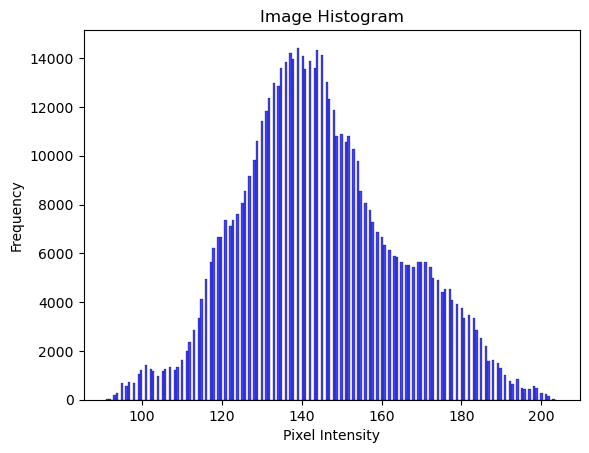

In [28]:
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Flatten the image array for histogram
img_flat = img.flatten()

# Display histogram using Seaborn
sns.histplot(img_flat, kde=False, color='blue')
plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


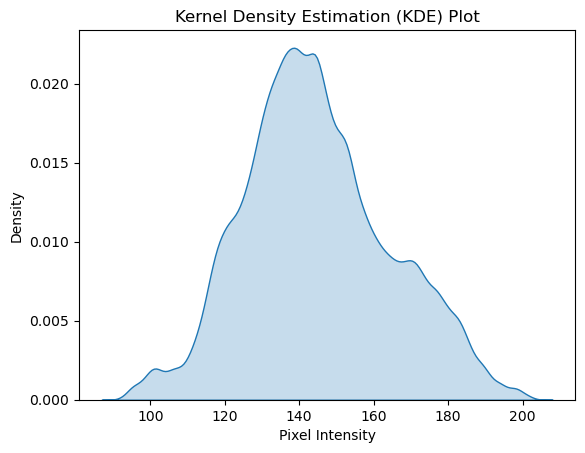

In [29]:
# Read the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Flatten the image array for KDE plot
img_flat = img.flatten()

# Display KDE plot using Seaborn
sns.kdeplot(img_flat, cmap='Blues', fill=True)
plt.title('Kernel Density Estimation (KDE) Plot')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.show()

In [6]:
images_dir = r"F:\new project 2025\Retina Disease\Data\acrima"

In [8]:
batch_size = 32
img_height = 500
img_width = 500

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1024 files belonging to 3 classes.
Using 820 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1024 files belonging to 3 classes.
Using 204 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)


['advance_glaucoma', 'no_glaucoma', 'normal_glaucoma']


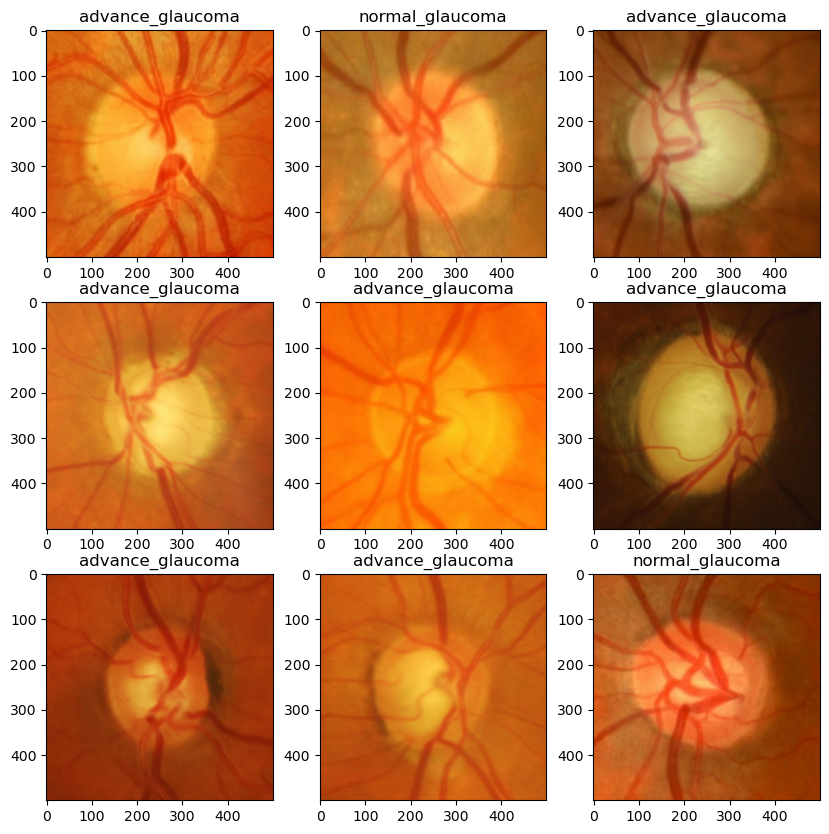

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 500, 500, 3)
(32,)


In [14]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [15]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.95294124


In [16]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 500, 500, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 500, 500, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 250, 250, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      1

In [19]:
epochs=8
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/8
26/26 [==============================] - 113s 4s/step - loss: 1.7275 - accuracy: 0.6866 - val_loss: 0.2879 - val_accuracy: 0.8971
Epoch 2/8
26/26 [==============================] - 140s 5s/step - loss: 0.2155 - accuracy: 0.9049 - val_loss: 0.1528 - val_accuracy: 0.9069
Epoch 3/8
26/26 [==============================] - 143s 5s/step - loss: 0.1370 - accuracy: 0.9488 - val_loss: 0.3071 - val_accuracy: 0.9020
Epoch 4/8
26/26 [==============================] - 123s 5s/step - loss: 0.1286 - accuracy: 0.9537 - val_loss: 0.1958 - val_accuracy: 0.9216
Epoch 5/8
26/26 [==============================] - 108s 4s/step - loss: 0.0890 - accuracy: 0.9634 - val_loss: 0.1026 - val_accuracy: 0.9461
Epoch 6/8
26/26 [==============================] - 124s 5s/step - loss: 0.1044 - accuracy: 0.9634 - val_loss: 0.1383 - val_accuracy: 0.9412
Epoch 7/8
26/26 [==============================] - 134s 5s/step - loss: 0.0655 - accuracy: 0.9732 - val_loss: 0.1526 - val_accuracy: 0.9412
Epoch 8/8
26/26 [===

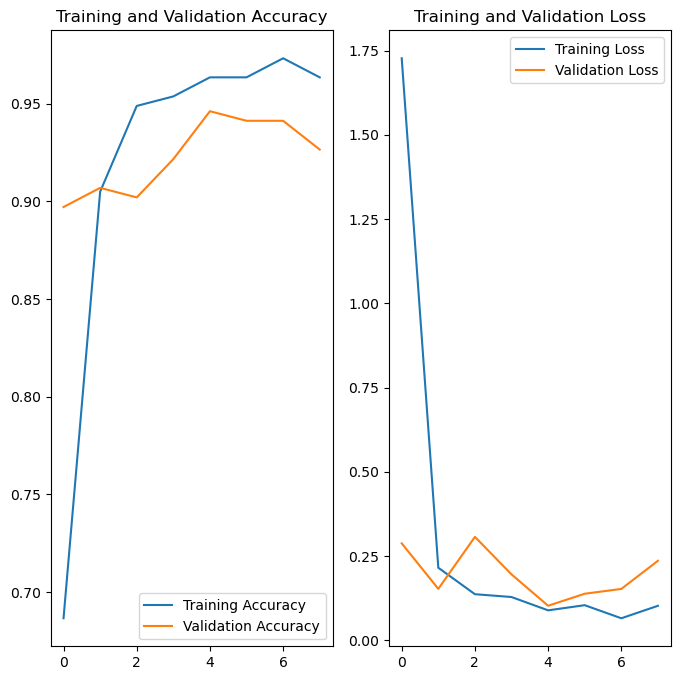

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    images_dir, # Put your path here
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 1024 images belonging to 3 classes.


C:\Users\DELL\AppData\Local\Temp\ipykernel_11336\2026915773.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)


In [22]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())

In [23]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

                  precision    recall  f1-score   support

advance_glaucoma       0.99      0.89      0.94       397
     no_glaucoma       1.00      1.00      1.00       318
 normal_glaucoma       0.88      0.99      0.93       309

        accuracy                           0.96      1024
       macro avg       0.96      0.96      0.96      1024
    weighted avg       0.96      0.96      0.96      1024



In [24]:
model.save("rentin_acrema.h5")